### Importación de datos



Se extraen los datos desde el github de Alura LATAM y se crean df a partir dee los csv

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
#Importacion de librerias
import matplotlib.pyplot as plt
import seaborn as sns

#1. Análisis de facturación



In [4]:
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

print(f'Ingreso de la Tienda 1: ${ingreso_tienda1: ,.2f}')
print(f'Ingreso de la Tienda 2: ${ingreso_tienda2: ,.2f}')
print(f'Ingreso de la Tienda 3: ${ingreso_tienda3: ,.2f}')
print(f'Ingreso de la Tienda 4: ${ingreso_tienda4: ,.2f}')

Ingreso de la Tienda 1: $ 1,150,880,400.00
Ingreso de la Tienda 2: $ 1,116,343,500.00
Ingreso de la Tienda 3: $ 1,098,019,600.00
Ingreso de la Tienda 4: $ 1,038,375,700.00


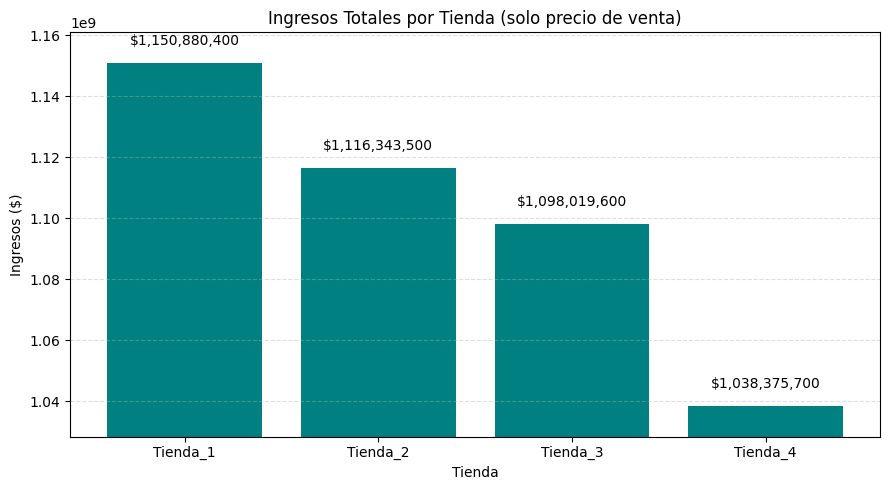

In [33]:
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
tiendas = ["Tienda_1", "Tienda_2", "Tienda_3", "Tienda_4"]

min_ingreso = min(ingresos)
y_min = min_ingreso - 10000000
y_max = max(ingresos) + 10000000

plt.figure(figsize=(9,5))
bars = plt.bar(tiendas, ingresos, color='teal')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5000000, f"${yval:,.0f}", ha='center', va='bottom')

plt.title("Ingresos Totales por Tienda (solo precio de venta)")
plt.ylabel("Ingresos ($)")
plt.xlabel("Tienda")
plt.ylim(y_min, y_max)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [22]:
ventas_cat1 = tienda["Categoría del Producto"].value_counts().head(5)
ventas_cat1.columns = ["Categoría", "Cantidad de Ventas"]

ventas_cat2 = tienda2["Categoría del Producto"].value_counts().head(5)
ventas_cat2.columns = ["Categoría", "Cantidad de Ventas"]

ventas_cat3 = tienda3["Categoría del Producto"].value_counts().head(5)
ventas_cat3.columns = ["Categoría", "Cantidad de Ventas"]

ventas_cat4 = tienda4["Categoría del Producto"].value_counts().head(5)
ventas_cat4.columns = ["Categoría", "Cantidad de Ventas"]

print("🔹Tienda 1:\n", ventas_cat1)
print("\n🔹Tienda 2:\n", ventas_cat2)
print("\n🔹Tienda 3:\n", ventas_cat3)
print("\n🔹Tienda 4:\n", ventas_cat4)

🔹Tienda 1:
 Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: count, dtype: int64

🔹Tienda 2:
 Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: count, dtype: int64

🔹Tienda 3:
 Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: count, dtype: int64

🔹Tienda 4:
 Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: count, dtype: int64


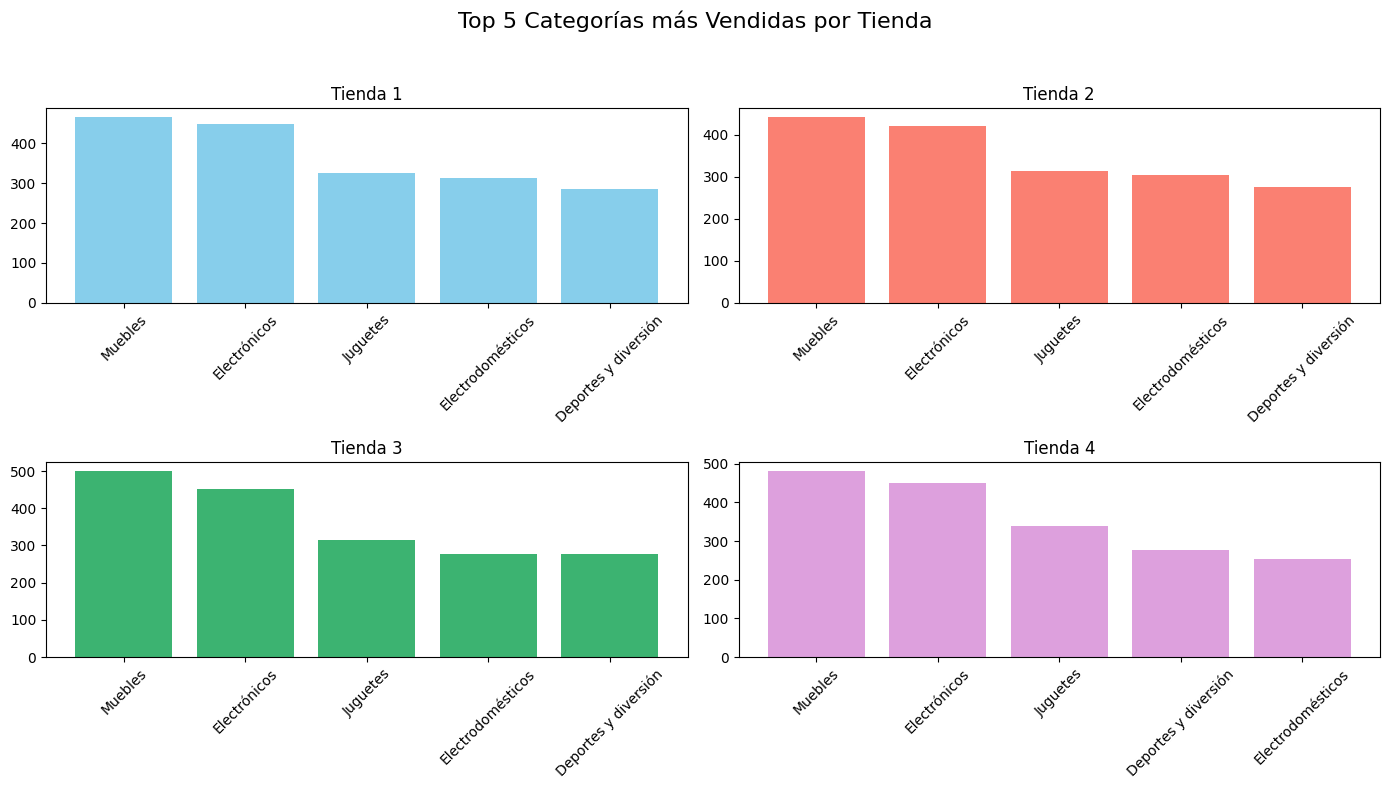

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Top 5 Categorías más Vendidas por Tienda", fontsize=16)

# Tienda 1
axs[0, 0].bar(ventas_cat1.index, ventas_cat1.values, color="skyblue")
axs[0, 0].set_title("Tienda 1")
axs[0, 0].tick_params(axis='x', rotation=45)

# Tienda 2
axs[0, 1].bar(ventas_cat2.index, ventas_cat2.values, color="salmon")
axs[0, 1].set_title("Tienda 2")
axs[0, 1].tick_params(axis='x', rotation=45)

# Tienda 3
axs[1, 0].bar(ventas_cat3.index, ventas_cat3.values, color="mediumseagreen")
axs[1, 0].set_title("Tienda 3")
axs[1, 0].tick_params(axis='x', rotation=45)

# Tienda 4
axs[1, 1].bar(ventas_cat4.index, ventas_cat4.values, color="plum")
axs[1, 1].set_title("Tienda 4")
axs[1, 1].tick_params(axis='x', rotation=45)

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# 3. Calificación promedio de la tienda


In [17]:
promedio_calif1 = tienda["Calificación"].mean()
promedio_calif2 = tienda2["Calificación"].mean()
promedio_calif3 = tienda3["Calificación"].mean()
promedio_calif4 = tienda4["Calificación"].mean()

print(f"Calificacion promedio de la tienda 1: {promedio_calif1: .2f}")
print(f"Calificacion promedio de la tienda 2: {promedio_calif2: .2f}")
print(f"Calificacion promedio de la tienda 3: {promedio_calif3: .2f}")
print(f"Calificacion promedio de la tienda 4: {promedio_calif4: .2f}")

Calificacion promedio de la tienda 1:  3.98
Calificacion promedio de la tienda 2:  4.04
Calificacion promedio de la tienda 3:  4.05
Calificacion promedio de la tienda 4:  4.00


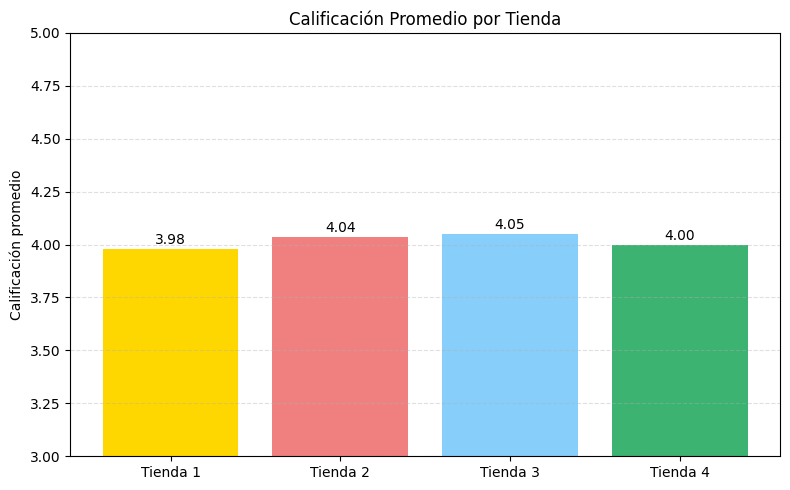

In [29]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios_calif = [promedio_calif1, promedio_calif2, promedio_calif3, promedio_calif4]

plt.figure(figsize=(8,5))
bars = plt.bar(tiendas, promedios_calif, color=['gold', 'lightcoral', 'lightskyblue', 'mediumseagreen'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.ylabel('Calificación promedio')
plt.title('Calificación Promedio por Tienda')
plt.ylim(3, 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [19]:
# Tienda 1
top_5_t1 = tienda['Producto'].value_counts().head(5)
bottom_5_t1 = tienda['Producto'].value_counts().tail(5)

# Tienda 2
top_5_t2 = tienda2['Producto'].value_counts().head(5)
bottom_5_t2 = tienda2['Producto'].value_counts().tail(5)

# Tienda 3
top_5_t3 = tienda3['Producto'].value_counts().head(5)
bottom_5_t3 = tienda3['Producto'].value_counts().tail(5)

# Tienda 4
top_5_t4 = tienda4['Producto'].value_counts().head(5)
bottom_5_t4 = tienda4['Producto'].value_counts().tail(5)

print("🔹 Tienda 1 - Productos más vendidos:\n", top_5_t1)
print("\n🔹 Tienda 1 - Productos menos vendidos:\n", bottom_5_t1)
print("\n🔹 Tienda 2 - Productos más vendidos:\n", top_5_t2)
print("\n🔹 Tienda 2 - Productos menos vendidos:\n", bottom_5_t2)
print("\n🔹 Tienda 3 - Productos más vendidos:\n", top_5_t3)
print("\n🔹 Tienda 3 - Productos menos vendidos:\n", bottom_5_t3)
print("\n🔹 Tienda 4 - Productos más vendidos:\n", top_5_t4)
print("\n🔹 Tienda 4 - Productos menos vendidos:\n", bottom_5_t4)

🔹 Tienda 1 - Productos más vendidos:
 Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

🔹 Tienda 1 - Productos menos vendidos:
 Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

🔹 Tienda 2 - Productos más vendidos:
 Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

🔹 Tienda 2 - Productos menos vendidos:
 Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

🔹 Tienda 3 - Productos más vendidos:
 Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de no

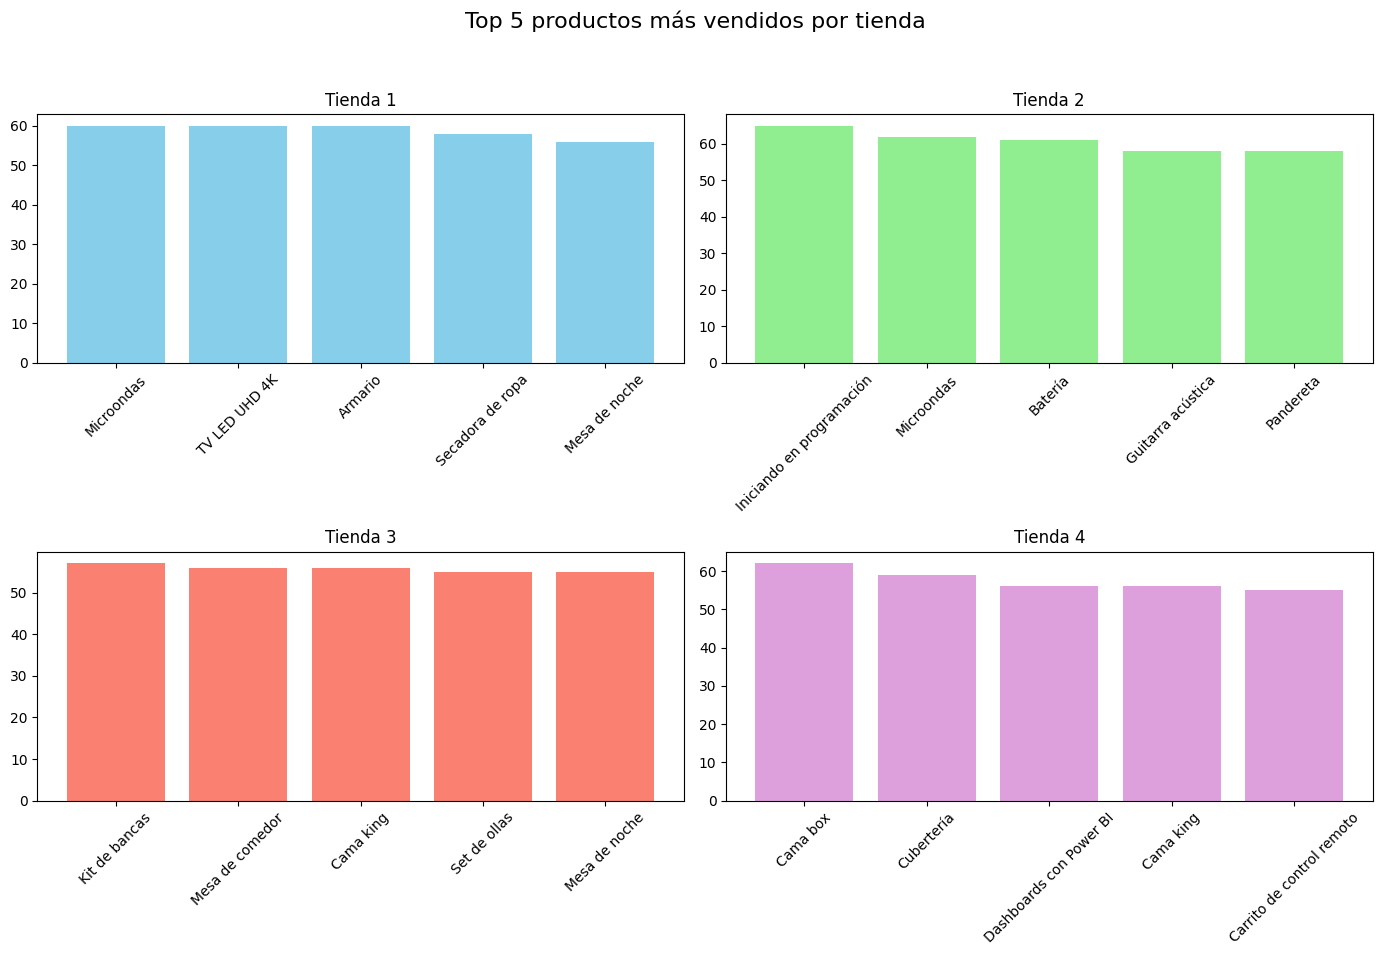

In [20]:
# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Top 5 productos más vendidos por tienda', fontsize=16)

# Tienda 1
axs[0, 0].bar(top_5_t1.index, top_5_t1.values, color='skyblue')
axs[0, 0].set_title('Tienda 1')
axs[0, 0].tick_params(axis='x', rotation=45)

# Tienda 2
axs[0, 1].bar(top_5_t2.index, top_5_t2.values, color='lightgreen')
axs[0, 1].set_title('Tienda 2')
axs[0, 1].tick_params(axis='x', rotation=45)

# Tienda 3
axs[1, 0].bar(top_5_t3.index, top_5_t3.values, color='salmon')
axs[1, 0].set_title('Tienda 3')
axs[1, 0].tick_params(axis='x', rotation=45)

# Tienda 4
axs[1, 1].bar(top_5_t4.index, top_5_t4.values, color='plum')
axs[1, 1].set_title('Tienda 4')
axs[1, 1].tick_params(axis='x', rotation=45)

# Ajustes finales
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


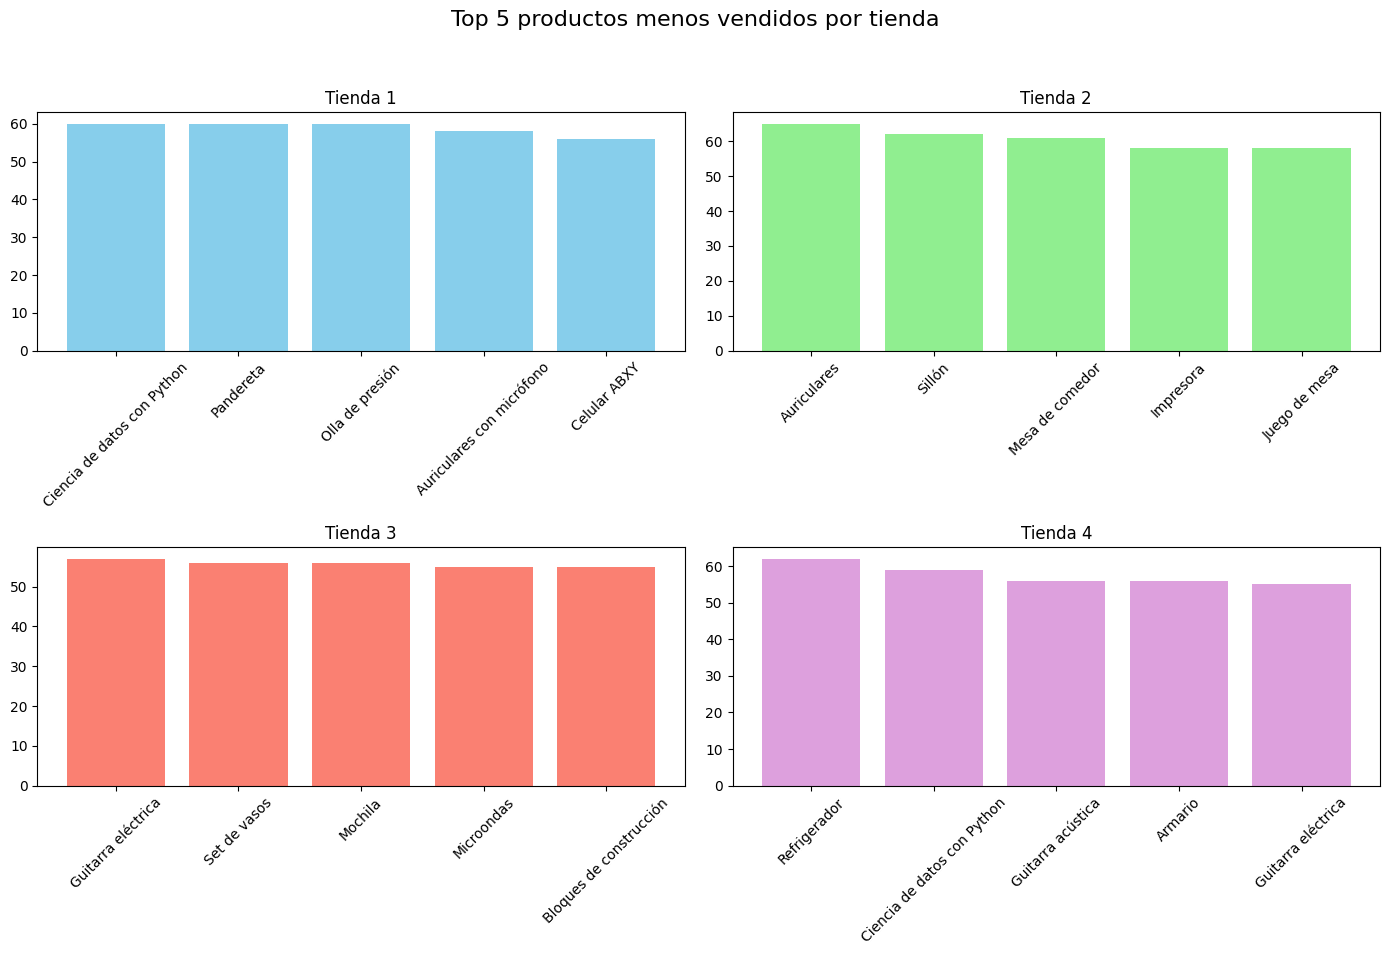

In [21]:
# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Top 5 productos menos vendidos por tienda', fontsize=16)

# Tienda 1
axs[0, 0].bar(bottom_5_t1.index, top_5_t1.values, color='skyblue')
axs[0, 0].set_title('Tienda 1')
axs[0, 0].tick_params(axis='x', rotation=45)

# Tienda 2
axs[0, 1].bar(bottom_5_t2.index, top_5_t2.values, color='lightgreen')
axs[0, 1].set_title('Tienda 2')
axs[0, 1].tick_params(axis='x', rotation=45)

# Tienda 3
axs[1, 0].bar(bottom_5_t3.index, top_5_t3.values, color='salmon')
axs[1, 0].set_title('Tienda 3')
axs[1, 0].tick_params(axis='x', rotation=45)

# Tienda 4
axs[1, 1].bar(bottom_5_t4.index, top_5_t4.values, color='plum')
axs[1, 1].set_title('Tienda 4')
axs[1, 1].tick_params(axis='x', rotation=45)

# Ajustes finales
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 5. Envío promedio por tienda

In [24]:
promedio_envio_t1 = tienda['Costo de envío'].mean()
promedio_envio_t2 = tienda2['Costo de envío'].mean()
promedio_envio_t3 = tienda3['Costo de envío'].mean()
promedio_envio_t4 = tienda4['Costo de envío'].mean()

print(f"Tienda 1: ${promedio_envio_t1:.2f}")
print(f"Tienda 2: ${promedio_envio_t2:.2f}")
print(f"Tienda 3: ${promedio_envio_t3:.2f}")
print(f"Tienda 4: ${promedio_envio_t4:.2f}")


Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


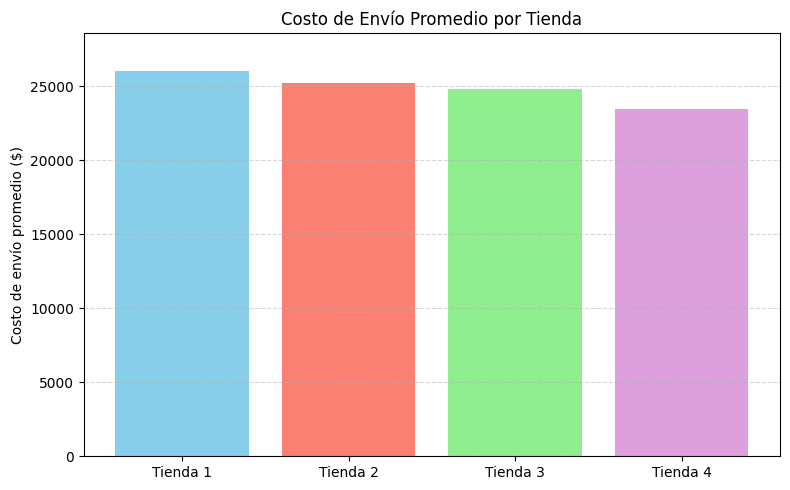

In [25]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios_envio = [promedio_envio_t1, promedio_envio_t2, promedio_envio_t3, promedio_envio_t4]

plt.figure(figsize=(8,5))
plt.bar(tiendas, promedios_envio, color=['skyblue', 'salmon', 'lightgreen', 'plum'])
plt.ylabel('Costo de envío promedio ($)')
plt.title('Costo de Envío Promedio por Tienda')
plt.ylim(0, max(promedios_envio)*1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
